### Importing required libraries

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve

### Creating Dataset 

In [2]:
REBUILD_DATA = False

In [3]:
class Flowers():
    IMG_SIZE = 50 #making all images to a common size here it is 50
    ASTIBLE = "flowers/astilbe"
    BELLFLOWER = "flowers/bellflower"
    BLACK_EYED_SUSAN = "flowers/black-eyed susan"
    CALENDULA = "flowers/calendula"
    CALIFORNIA_POPPY = "flowers/california poppy"
    CARNATION = "flowers/carnation"
    COMMON_DAISY = "flowers/common daisy"
    COREOPSIS = "flowers/coreopsis"
    DANDELION = "flowers/dandelion"
    IRIS = "flowers/iris"
    ROSE = "flowers/rose"
    SUNFLOWER = "flowers/sunflower"
    TULIP = "flowers/tulip"

    LABELS = {ASTIBLE:0,
              BELLFLOWER:1,
              BLACK_EYED_SUSAN:2,
              CALENDULA:3,
              CALIFORNIA_POPPY:4,
              CARNATION:5,
              COMMON_DAISY:6,
              COREOPSIS:7,
              DANDELION:8,
              IRIS:9,
              ROSE:10,
              SUNFLOWER:11,
              TULIP:12}
    
    training_data = []
    astible_count = 0;
    bellflower_count = 0;
    black_eyed_susan_count = 0;
    calendula_count = 0;
    california_poppy_count = 0;
    carnation_count = 0;
    common_daisy_count = 0;
    coreoposis_count = 0;
    dandelion_count = 0;
    iris_count = 0;
    rose_count = 0;
    sunflower_count = 0;
    tulip_count = 0;
    
    def make_training_data(self):
        for label in self.LABELS:  #labels is dict and the keys in that are directories
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(13)[self.LABELS[label]]])

                    if label == self.ASTIBLE :
                        self.astible_count  += 1
                    elif label == self.BELLFLOWER :
                        self.bellflower_count  += 1
                    elif label == self.BLACK_EYED_SUSAN :
                        self.black_eyed_susan_count  += 1
                    elif label == self.CALENDULA :
                        self.calendula_count  += 1
                    elif label == self.CALIFORNIA_POPPY :
                        self.california_poppy_count  += 1
                    elif label == self.CARNATION :
                        self.carnation_count  += 1
                    elif label == self.COMMON_DAISY :
                        self.common_daisy_count  += 1
                    elif label == self.COREOPSIS :
                        self.coreoposis_count  += 1
                    elif label == self.DANDELION :
                        self.dandelion_count  += 1
                    elif label == self.IRIS :
                        self.iris_count  += 1
                    elif label == self.ROSE :
                        self.rose_count  += 1
                    elif label == self.SUNFLOWER :
                        self.sunflower_count  += 1
                    elif label == self.TULIP  :
                        self.tulip_count  += 1
                
                except Exception as e:
                    pass
#                     print(str(e))
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("astible: ", self.astible_count )
        print("bellflower: ", self.bellflower_count )
        print("vlack_eyed_susan: ", self.black_eyed_susan_count )
        print("calendula: ", self.calendula_count )
        print("california_poppy: ", self.california_poppy_count )
        print("carnation: ", self.carnation_count )
        print("common_daisy: ", self.common_daisy_count )
        print("coreoposis: ", self.coreoposis_count )
        print("dandelion: ", self.dandelion_count )
        print("iris: ", self.iris_count )
        print("rose: ", self.rose_count )
        print("sunflower: ", self.sunflower_count )
        print("tulip: ", self.tulip_count )



if REBUILD_DATA:
    flowers = Flowers();
    flowers.make_training_data()

In [4]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [5]:
print(len(training_data))

12847


In [6]:
print(training_data[0][1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Sample flower image and and it's label

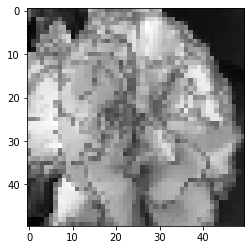

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
plt.imshow(training_data[0][0],cmap = "gray")
plt.show()
print(training_data[0][1])

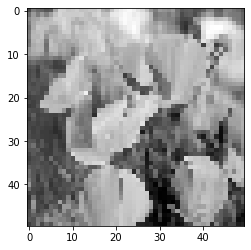

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
plt.imshow(training_data[1][0],cmap = "gray")
plt.show()
print(training_data[1][1])

### Buidling the Neural Network model

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5) #input output kernel(window) size
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x);
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512,13)
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2)) #(2,2) shape of pooling
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),(2,2))
    
#         print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x 
    
    def forward(self,x): 
#         print(self._to_linear)
        x = self.convs(x) #pass through all the convo layer
        x = x.view(-1, self._to_linear)  #flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x,dim = 1)
        
net = Net()

In [10]:
import torch.optim as optim
optimizer =  optim.Adam(net.parameters(), lr=0.001)
loss_funtion = nn.MSELoss()

In [11]:
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0 #converting values in the range of 0-1
y = torch.Tensor([i[1] for i in training_data])


C:\Users\sagar\AppData\Local\Temp/ipykernel_22068/199161659.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


In [12]:
X[0][1]

tensor([0.4157, 0.2627, 0.2078, 0.1647, 0.2235, 0.2510, 0.2118, 0.1961, 0.1804,
        0.1804, 0.1569, 0.1098, 0.1451, 0.1490, 0.5137, 0.4667, 0.5451, 0.6118,
        0.4980, 0.5373, 0.5569, 0.5216, 0.4824, 0.6078, 0.4118, 0.4510, 0.5255,
        0.6000, 0.6039, 0.6118, 0.5412, 0.2902, 0.1216, 0.1098, 0.1059, 0.1059,
        0.0980, 0.1098, 0.1059, 0.1098, 0.1098, 0.1176, 0.1098, 0.1098, 0.1137,
        0.1255, 0.1255, 0.1333, 0.1412, 0.1451])

In [13]:
VAL_PCT = 0.2
val_size = int(len(X)*VAL_PCT)
print(val_size)

2569


In [14]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [15]:
print(len(train_X))
print(len(train_y))

10278
10278


In [16]:
print(len(test_X))
print(len(test_y))

2569
2569


In [17]:
BATCH_SIZE = 100
EPOCHS = 20
l = []
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
#         print(i, i+BATCH_SIZE)
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
        
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_funtion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
    l.append(loss)  
    print(loss)


100%|██████████| 103/103 [00:22<00:00,  4.49it/s]


tensor(0.0664, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:25<00:00,  3.98it/s]


tensor(0.0618, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.53it/s]


tensor(0.0572, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:21<00:00,  4.78it/s]


tensor(0.0544, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.48it/s]


tensor(0.0501, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:21<00:00,  4.77it/s]


tensor(0.0479, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.55it/s]


tensor(0.0430, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:27<00:00,  3.78it/s]


tensor(0.0452, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.68it/s]


tensor(0.0421, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.63it/s]


tensor(0.0393, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:21<00:00,  4.68it/s]


tensor(0.0375, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:21<00:00,  4.68it/s]


tensor(0.0369, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.52it/s]


tensor(0.0376, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.54it/s]


tensor(0.0361, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.64it/s]


tensor(0.0361, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.64it/s]


tensor(0.0316, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.67it/s]


tensor(0.0364, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.64it/s]


tensor(0.0287, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:22<00:00,  4.51it/s]


tensor(0.0294, grad_fn=<MseLossBackward0>)


100%|██████████| 103/103 [00:21<00:00,  4.69it/s]

tensor(0.0256, grad_fn=<MseLossBackward0>)


In [18]:
l

[tensor(0.0664, grad_fn=<MseLossBackward0>),
 tensor(0.0618, grad_fn=<MseLossBackward0>),
 tensor(0.0572, grad_fn=<MseLossBackward0>),
 tensor(0.0544, grad_fn=<MseLossBackward0>),
 tensor(0.0501, grad_fn=<MseLossBackward0>),
 tensor(0.0479, grad_fn=<MseLossBackward0>),
 tensor(0.0430, grad_fn=<MseLossBackward0>),
 tensor(0.0452, grad_fn=<MseLossBackward0>),
 tensor(0.0421, grad_fn=<MseLossBackward0>),
 tensor(0.0393, grad_fn=<MseLossBackward0>),
 tensor(0.0375, grad_fn=<MseLossBackward0>),
 tensor(0.0369, grad_fn=<MseLossBackward0>),
 tensor(0.0376, grad_fn=<MseLossBackward0>),
 tensor(0.0361, grad_fn=<MseLossBackward0>),
 tensor(0.0361, grad_fn=<MseLossBackward0>),
 tensor(0.0316, grad_fn=<MseLossBackward0>),
 tensor(0.0364, grad_fn=<MseLossBackward0>),
 tensor(0.0287, grad_fn=<MseLossBackward0>),
 tensor(0.0294, grad_fn=<MseLossBackward0>),
 tensor(0.0256, grad_fn=<MseLossBackward0>)]

In [19]:
loss = []
for i in range(EPOCHS):
    temp = l[i].tolist()
    loss.append(temp)
loss

[0.066434845328331,
 0.06181342899799347,
 0.05717094987630844,
 0.05440849810838699,
 0.05011361464858055,
 0.04791644588112831,
 0.042976200580596924,
 0.045214761048555374,
 0.04208185151219368,
 0.039255790412425995,
 0.03747861459851265,
 0.036875270307064056,
 0.03764946013689041,
 0.03610672801733017,
 0.03612667694687843,
 0.03157510608434677,
 0.03637870028614998,
 0.028708022087812424,
 0.02935303933918476,
 0.025562850758433342]

### Loss Curves

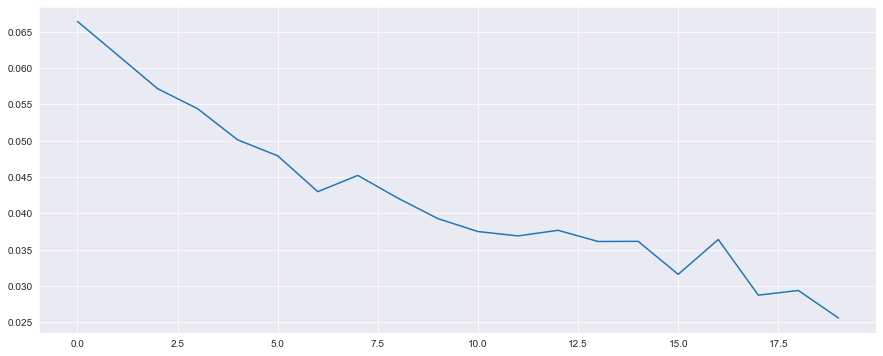

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 6))
sns.lineplot(data = loss)
plt.show()

## Training Results  

In [21]:
correct = 0;
total = 0;

true_class = []
pred_class = []

with torch.no_grad():
    for i in tqdm(range(len(train_X))):
        real_class = torch.argmax(train_y[i])
        true_class.append(real_class)
        net_out = net(train_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        pred_class.append(predicted_class)
        if predicted_class == real_class:
            correct += 1
        total += 1
        
print("Accuracy: ", round(correct/total , 3))

100%|██████████| 10278/10278 [00:10<00:00, 1009.30it/s]

Accuracy:  0.718


In [22]:
arr = multilabel_confusion_matrix(true_class, pred_class)

In [23]:
tn = arr[:, 0, 0]
tp = arr[:, 1, 1]
fn = arr[:, 1, 0]
fp = arr[:, 0, 1]

### Accuracy score

In [24]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc

array([0.95397937, 0.94424985, 0.97927612, 0.93500681, 0.94288772,
       0.94580658, 0.94833625, 0.96088733, 0.96409807, 0.97100603,
       0.95602257, 0.96944931, 0.96507103])

###  Recall 

In [25]:
recall = (tp) / (tp+fn)
recall

array([0.73539519, 0.61626248, 0.90761548, 0.58527607, 0.70060606,
       0.57412399, 0.83709273, 0.58760429, 0.86418269, 0.66903073,
       0.69400245, 0.90754258, 0.64452214])

### Precision

In [26]:
precision = (tp) / (tp+fp)
precision

array([0.5729585 , 0.58695652, 0.83949192, 0.59107807, 0.62962963,
       0.63868066, 0.62488307, 0.89799636, 0.7374359 , 0.96917808,
       0.7373212 , 0.75813008, 0.91103789])

### ROC curve

In [27]:
fpr, tpr, thresholds = roc_curve(true_class, pred_class, pos_label=2)

In [28]:
fpr

array([0.        , 0.06394429, 0.16608631, 0.24691358, 0.30843094,
       0.41110056, 0.46881925, 0.58024691, 0.65020576, 0.7467553 ,
       0.83138124, 0.84604833, 0.92276037, 1.        ])

In [29]:
tpr

array([0.        , 0.00124844, 0.02122347, 0.02496879, 0.02621723,
       0.02871411, 0.03121099, 0.0474407 , 0.05243446, 0.05617978,
       0.06242197, 0.97003745, 0.98127341, 1.        ])

In [30]:
thresholds

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

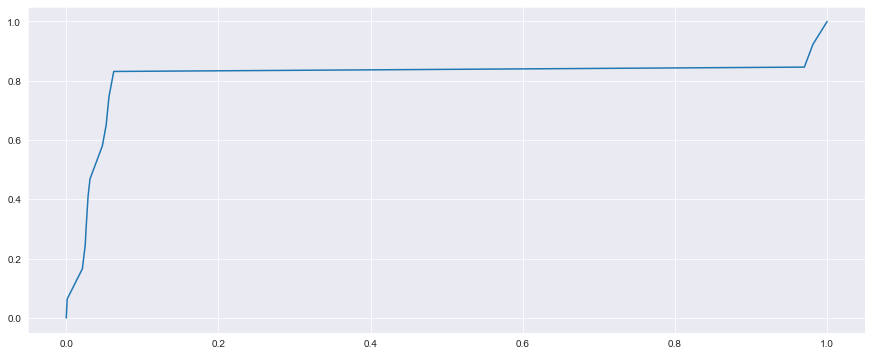

In [31]:
plt.figure(figsize = (15, 6))
plt.plot(tpr,fpr)
plt.show()

## Testing Results

In [32]:
correct = 0;
total = 0;

true_class = []
pred_class = []

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        true_class.append(real_class)
        net_out = net(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        pred_class.append(predicted_class)
        if predicted_class == real_class:
            correct += 1
        total += 1
        

print("Accuracy: ", round(correct/total , 3))

100%|██████████| 2569/2569 [00:02<00:00, 1007.04it/s]

Accuracy:  0.424


In [33]:
arr = multilabel_confusion_matrix(true_class, pred_class)
arr

array([[[2275,  136],
        [  93,   65]],

       [[2198,  186],
        [ 141,   44]],

       [[2293,   77],
        [  67,  132]],

       [[2198,  161],
        [ 145,   65]],

       [[2207,  152],
        [ 124,   86]],

       [[2252,  121],
        [ 159,   37]],

       [[2153,  222],
        [  88,  106]],

       [[2314,   45],
        [ 161,   49]],

       [[2243,  106],
        [  58,  162]],

       [[2318,   42],
        [ 152,   57]],

       [[2285,  101],
        [ 112,   71]],

       [[2273,   91],
        [  44,  161]],

       [[2339,   40],
        [ 136,   54]]], dtype=int64)

In [34]:
tn = arr[:, 0, 0]
tp = arr[:, 1, 1]
fn = arr[:, 1, 0]
fp = arr[:, 0, 1]

In [35]:
tn

array([2275, 2198, 2293, 2198, 2207, 2252, 2153, 2314, 2243, 2318, 2285,
       2273, 2339], dtype=int64)

In [36]:
tp

array([ 65,  44, 132,  65,  86,  37, 106,  49, 162,  57,  71, 161,  54],
      dtype=int64)

In [37]:
fp

array([136, 186,  77, 161, 152, 121, 222,  45, 106,  42, 101,  91,  40],
      dtype=int64)

In [38]:
fn

array([ 93, 141,  67, 145, 124, 159,  88, 161,  58, 152, 112,  44, 136],
      dtype=int64)

In [39]:
arr[0][0][0]

2275

### Accuracy Score

In [40]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc

array([0.91086026, 0.87271312, 0.94394706, 0.8808875 , 0.8925652 ,
       0.89100817, 0.87933048, 0.91981316, 0.93616193, 0.92448424,
       0.91708836, 0.94745037, 0.93149085])

### Recall

In [41]:
recall = (tp) / (tp+fn)
recall

array([0.41139241, 0.23783784, 0.66331658, 0.30952381, 0.40952381,
       0.18877551, 0.54639175, 0.23333333, 0.73636364, 0.27272727,
       0.38797814, 0.78536585, 0.28421053])

### Precision

In [42]:
precision = (tp) / (tp+fp)
precision

array([0.32338308, 0.19130435, 0.63157895, 0.28761062, 0.36134454,
       0.23417722, 0.32317073, 0.5212766 , 0.60447761, 0.57575758,
       0.4127907 , 0.63888889, 0.57446809])

### ROC curves

In [43]:
fpr, tpr, thresholds = roc_curve(true_class, pred_class, pos_label=2)

In [44]:
fpr

array([0.        , 0.03881857, 0.14135021, 0.21308017, 0.25274262,
       0.36582278, 0.40337553, 0.53459916, 0.59915612, 0.69915612,
       0.79198312, 0.82447257, 0.91940928, 1.        ])

In [45]:
tpr

array([0.        , 0.01005025, 0.05527638, 0.06532663, 0.09045226,
       0.09045226, 0.11557789, 0.20100503, 0.22613065, 0.23115578,
       0.26130653, 0.92462312, 0.94974874, 1.        ])

In [46]:
thresholds

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

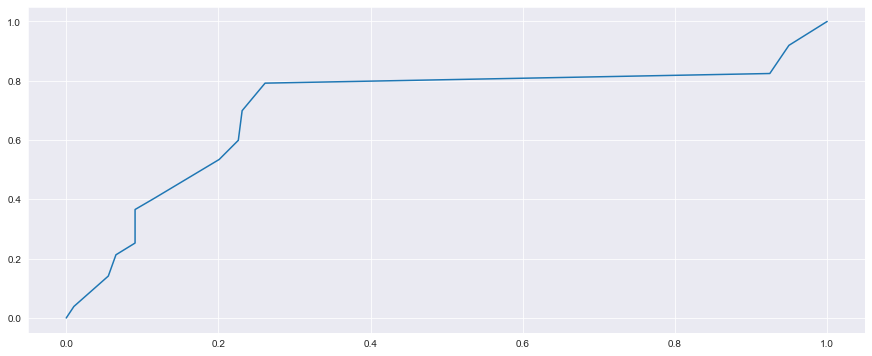

In [47]:
plt.figure(figsize = (15, 6))
plt.plot(tpr,fpr)
plt.show()